# Problem 1

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Creating an Evaluation Metric Table

In [2]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

### Reading the Dataset

In [3]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [5]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['House size (sqft)'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data["House price of unit area"], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['House size (sqft)'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data["House price of unit area"], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['House size (sqft)']],df["House price of unit area"],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Price for Test Data: 38.429
Intercept: 36.667471860543735
Coefficient: [0.00128921]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,13.907,0.001,-,0.004,-,-0.013


In [6]:
sns.set(style="white", font_scale=1)

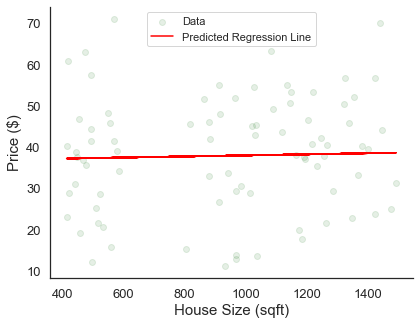

In [7]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("House Size (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

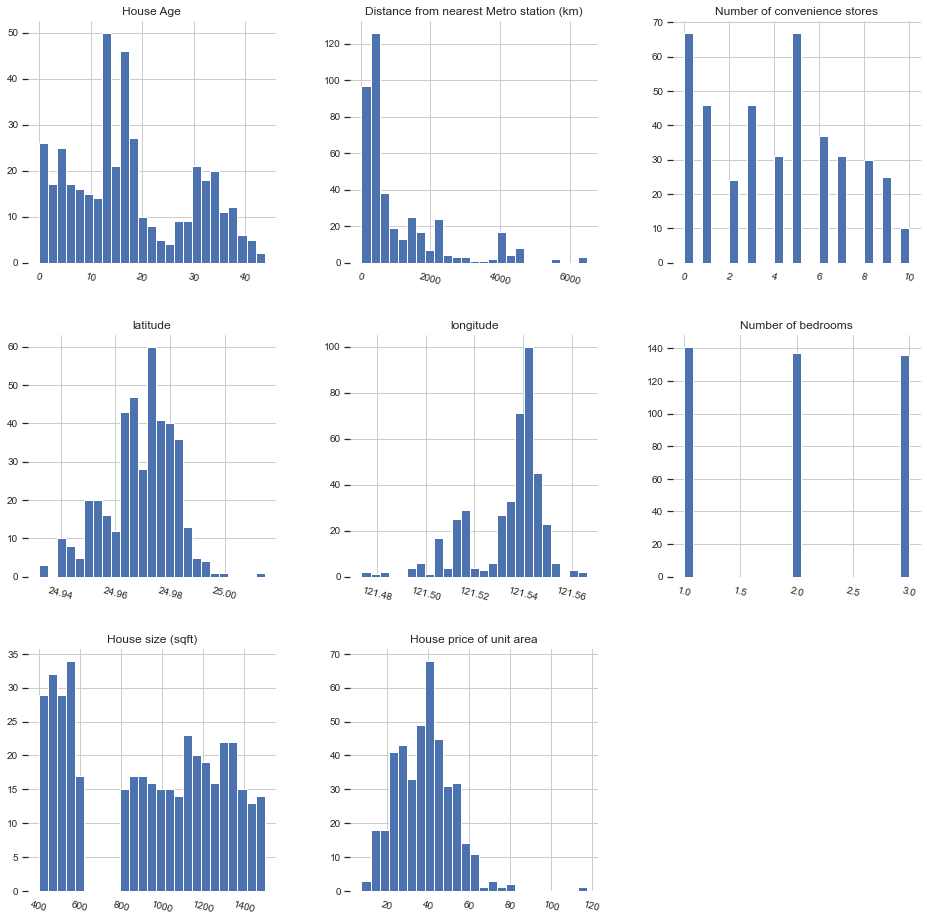

In [8]:
df1=df[['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'latitude',
    'longitude', 'Number of bedrooms', 'House size (sqft)', 'House price of unit area']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

### Plotting the Pearson Correlation Matrix

We use the correlation matrix to figure out the correlation of each feature with the price of the houses.

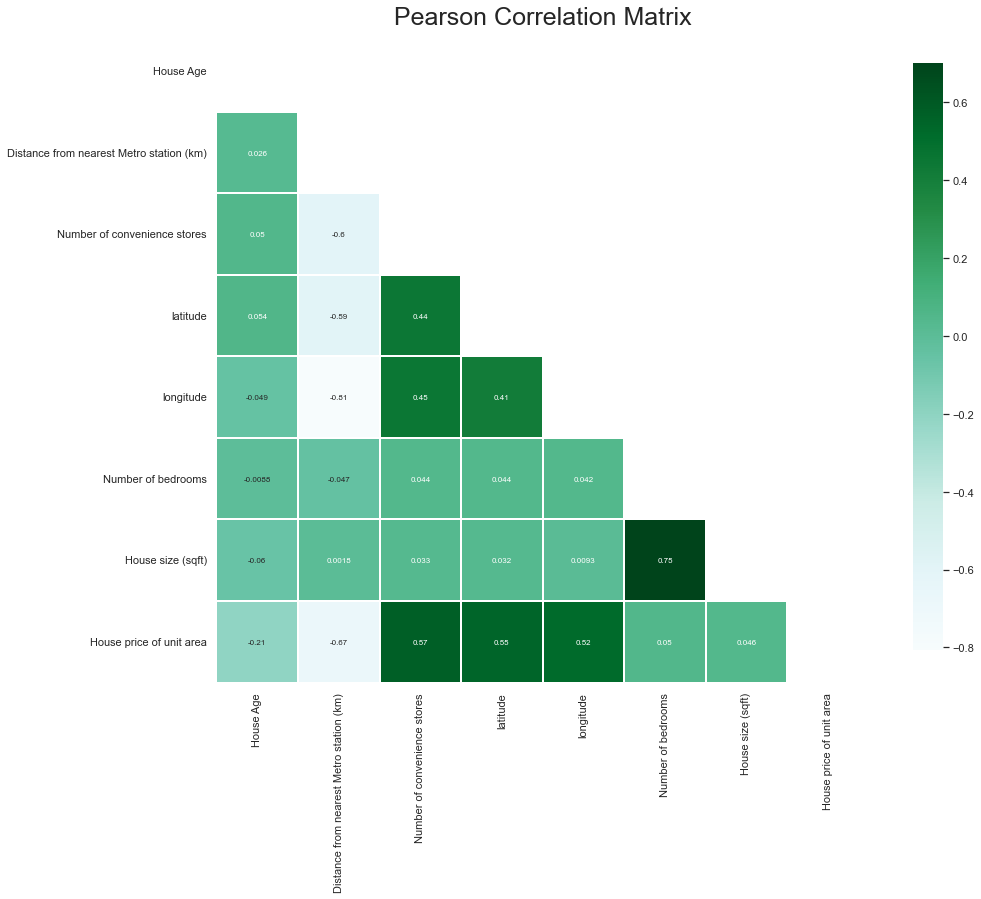

In [9]:
features = ['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'latitude',
    'longitude', 'Number of bedrooms', 'House size (sqft)', 'House price of unit area']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [10]:
train_data, test_data = train_test_split(df, train_size = 0.8, random_state=3)

## Multiple Regression

### With All features

In [11]:
features = ['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'latitude',
    'longitude', 'Number of bedrooms', 'House size (sqft)']

In [12]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['House price of unit area'])

LinearRegression()

In [13]:
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['House price of unit area'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['House price of unit area']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['House price of unit area']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['House price of unit area']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['House price of unit area']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df[features],df['House price of unit area'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','All features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 351.592084491212
Coefficients: [-2.60611610e-01 -4.76877743e-03  1.14325116e+00  2.12459234e+02
 -4.61999439e+01  2.91758440e-01  6.72398187e-04]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,All features,8.920,0.564,0.556,0.590,0.558,0.569
0,Simple Linear Regression,-,13.907,0.001,-,0.004,-,-0.013


### With Selected Features

In [14]:
features = ['Number of convenience stores', 'latitude',
    'longitude', 'Number of bedrooms', 'House size (sqft)']

In [15]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['House price of unit area'])

LinearRegression()

In [16]:
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['House price of unit area'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['House price of unit area']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['House price of unit area']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['House price of unit area']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['House price of unit area']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df[features],df['House price of unit area'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -31877.791933017987
Coefficients: [1.58462410e+00 3.22225767e+02 1.96342523e+02 1.70684053e-01
 8.22410197e-04]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,All features,8.920,0.564,0.556,0.590,0.558,0.569
2,Multiple Regression-2,selected features,9.724,0.471,0.464,0.513,0.488,0.470
0,Simple Linear Regression,-,13.907,0.001,-,0.004,-,-0.013


### Ridge Regression

In [17]:
features = ['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'latitude',
    'longitude', 'Number of bedrooms', 'House size (sqft)']

In [18]:
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data[features],train_data["House price of unit area"])

pred1 = complex_model_R.predict(test_data[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data[features],train_data["House price of unit area"]),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data["House price of unit area"]),train_data.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data[features],test_data["House price of unit area"]),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data["House price of unit area"]),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,df[features],df["House price of unit area"],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data[features],train_data["House price of unit area"])

pred2 = complex_model_R.predict(test_data[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data[features],train_data["House price of unit area"]),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data["House price of unit area"]),train_data.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data[features],test_data["House price of unit area"]),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data["House price of unit area"]),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,df[features],df["House price of unit area"],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data[features],train_data["House price of unit area"])

pred3 = complex_model_R.predict(test_data[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data[features],train_data["House price of unit area"]),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data[features],train_data["House price of unit area"]),train_data.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data[features],test_data["House price of unit area"]),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data[features],test_data["House price of unit area"]),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,df[features],df["House price of unit area"],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,All features,8.920,0.564,0.556,0.590,0.558,0.569
3,Ridge Regression,"alpha=1, all features",9.367,0.541,0.532,0.548,0.512,0.542
4,Ridge Regression,"alpha=100, all features",9.377,0.539,0.531,0.547,0.511,0.541
5,Ridge Regression,"alpha=1000, all features",9.440,0.533,0.524,0.541,0.505,0.535
2,Multiple Regression-2,selected features,9.724,0.471,0.464,0.513,0.488,0.470
0,Simple Linear Regression,-,13.907,0.001,-,0.004,-,-0.013


### Lasso Regression

In [19]:
features = ['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'latitude',
    'longitude', 'Number of bedrooms', 'House size (sqft)']

In [20]:
complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data[features],train_data["House price of unit area"])

pred1 = complex_model_L.predict(test_data[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data[features],train_data["House price of unit area"]),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data[features],train_data["House price of unit area"]),train_data.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data[features],test_data["House price of unit area"]),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data[features],test_data["House price of unit area"]),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,df[features],df["House price of unit area"],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data[features],train_data["House price of unit area"])

pred2 = complex_model_L.predict(test_data[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data[features],train_data["House price of unit area"]),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data[features],train_data["House price of unit area"]),train_data.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data[features],test_data["House price of unit area"]),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data[features],test_data["House price of unit area"]),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,df[features],df["House price of unit area"],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data[features],train_data["House price of unit area"])

pred3 = complex_model_L.predict(test_data[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data[features],train_data["House price of unit area"]),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data[features],train_data["House price of unit area"]),train_data.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data[features],test_data["House price of unit area"]),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data[features],test_data["House price of unit area"]),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,df[features],df["House price of unit area"],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,All features,8.920,0.564,0.556,0.590,0.558,0.569
3,Ridge Regression,"alpha=1, all features",9.367,0.541,0.532,0.548,0.512,0.542
4,Ridge Regression,"alpha=100, all features",9.377,0.539,0.531,0.547,0.511,0.541
6,Lasso Regression,"alpha=1, all features",9.379,0.538,0.529,0.547,0.511,0.541
5,Ridge Regression,"alpha=1000, all features",9.440,0.533,0.524,0.541,0.505,0.535
2,Multiple Regression-2,selected features,9.724,0.471,0.464,0.513,0.488,0.470
8,Lasso Regression,"alpha=1000, all features",10.264,0.449,0.439,0.457,0.414,0.458
7,Lasso Regression,"alpha=100, all features",10.292,0.456,0.446,0.454,0.411,0.453
0,Simple Linear Regression,-,13.907,0.001,-,0.004,-,-0.013


## Polynomial Regression

### Evaluation Table for Polynomial Regression

In [21]:
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

### Linear Regression

In [22]:
features = ['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'latitude',
    'longitude', 'Number of bedrooms', 'House size (sqft)']

#### Degree = 2

In [23]:
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data["House price of unit area"])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data["House price of unit area"]),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data["House price of unit area"]),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df["House price of unit area"],cv=5).mean(),'.3f'))

#### Degree = 3

In [24]:
polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data["House price of unit area"])

pred2 = poly.predict(X_testpoly)
rmsepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data["House price of unit area"]),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data["House price of unit area"]),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df["House price of unit area"],cv=5).mean(),'.3f'))

#### Ridge ($\alpha$ = 1)

In [25]:
polyfeat = PolynomialFeatures(degree = 2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.Ridge(alpha = 1).fit(X_trainpoly,train_data["House price of unit area"])

pred3 = poly.predict(X_testpoly)
rmsepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data["House price of unit area"]),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data["House price of unit area"]),'.3f'))
cv3 = float(format(cross_val_score(linear_model.Ridge(alpha = 1),X_allpoly,df["House price of unit area"],cv = 5).mean(),'.3f'))

#### Ridge ($\alpha$ = 50000)

In [26]:
polyfeat = PolynomialFeatures(degree = 2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.Ridge(alpha = 50000).fit(X_trainpoly,train_data["House price of unit area"])

pred4 = poly.predict(X_testpoly)
rmsepoly4 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred4)),'.3f'))
rtrpoly4 = float(format(poly.score(X_trainpoly,train_data["House price of unit area"]),'.3f'))
rtepoly4 = float(format(poly.score(X_testpoly,test_data["House price of unit area"]),'.3f'))
cv4 = float(format(cross_val_score(linear_model.Ridge(alpha = 50000),X_allpoly,df["House price of unit area"],cv = 5).mean(),'.3f'))

#### Lasso ($\alpha$ = 1)

In [27]:
polyfeat = PolynomialFeatures(degree = 2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.Lasso(alpha = 1).fit(X_trainpoly,train_data["House price of unit area"])

pred5 = poly.predict(X_testpoly)
rmsepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred5)),'.3f'))
rtrpoly5 = float(format(poly.score(X_trainpoly,train_data["House price of unit area"]),'.3f'))
rtepoly5 = float(format(poly.score(X_testpoly,test_data["House price of unit area"]),'.3f'))
cv5 = float(format(cross_val_score(linear_model.Lasso(alpha = 1),X_allpoly,df["House price of unit area"],cv = 5).mean(),'.3f'))

#### Lasso ($\alpha$ = 50000)

In [28]:
polyfeat = PolynomialFeatures(degree = 2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.Lasso(alpha = 50000).fit(X_trainpoly,train_data["House price of unit area"])

pred6 = poly.predict(X_testpoly)
rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data["House price of unit area"],pred6)),'.3f'))
rtrpoly6 = float(format(poly.score(X_trainpoly,train_data["House price of unit area"]),'.3f'))
rtepoly6 = float(format(poly.score(X_testpoly,test_data["House price of unit area"]),'.3f'))
cv6 = float(format(cross_val_score(linear_model.Lasso(alpha = 50000),X_allpoly,df["House price of unit area"],cv = 5).mean(),'.3f'))

In [29]:
r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree = 2, all features',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree = 3, all features', rmsepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]
evaluation_poly.loc[r+2] = ['PolynomialRidgeRegression','alpha = 1,degree = 2,allfeatures',rmsepoly3,rtrpoly3,'-',rtepoly3,'-',cv3]
evaluation_poly.loc[r+3] = ['PolynomialRidgeRegression','alpha = 50000,degree = 2,allfeatures',rmsepoly4,rtrpoly4,'-',rtepoly4,'-',cv4]
evaluation_poly.loc[r+4] = ['PolynomialLassoRegression','alpha = 1,degree = 2, allfeatures',rmsepoly5,rtrpoly5,'-',rtepoly5,'-',cv5]
evaluation_poly.loc[r+5] = ['PolynomialLassoRegression','alpha = 50000, degree = 2, allfeatures',rmsepoly6,rtrpoly6,'-',rtepoly6,'-',cv6]
evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending = False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
2,PolynomialRidgeRegression,"alpha = 1,degree = 2,allfeatures",8.008,0.679,0.670,0.650
4,PolynomialLassoRegression,"alpha = 1,degree = 2, allfeatures",8.638,0.660,0.616,0.638
3,PolynomialRidgeRegression,"alpha = 50000,degree = 2,allfeatures",8.855,0.654,0.596,0.632
5,PolynomialLassoRegression,"alpha = 50000, degree = 2, allfeatures",9.844,0.523,0.501,0.515
0,Polynomial Regression,"degree = 2, all features",11.595,0.496,0.307,0.072
1,Polynomial Regression,"degree = 3, all features",18.226,0.478,-0.711,-1.126


### k-NN Regression

In [30]:
knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data[features],train_data["House price of unit area"])
pred = knnreg.predict(test_data[features])

rmseknn1 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn1 = float(format(knnreg.score(train_data[features],train_data["House price of unit area"]),'.3f'))
artrknn1 = float(format(adjustedR2(knnreg.score(train_data[features],train_data["House price of unit area"]),train_data.shape[0],len(features)),'.3f'))
rteknn1 = float(format(knnreg.score(test_data[features],test_data["House price of unit area"]),'.3f'))
arteknn1 = float(format(adjustedR2(knnreg.score(test_data[features],test_data["House price of unit area"]),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(knnreg,df[features],df["House price of unit area"],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=25)
knnreg.fit(train_data[features],train_data["House price of unit area"])
pred = knnreg.predict(test_data[features])

rmseknn2 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn2 = float(format(knnreg.score(train_data[features],train_data["House price of unit area"]),'.3f'))
artrknn2 = float(format(adjustedR2(knnreg.score(train_data[features],train_data["House price of unit area"]),train_data.shape[0],len(features)),'.3f'))
rteknn2 = float(format(knnreg.score(test_data[features],test_data["House price of unit area"]),'.3f'))
arteknn2 = float(format(adjustedR2(knnreg.score(test_data[features],test_data["House price of unit area"]),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(knnreg,df[features],df["House price of unit area"],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=27)
knnreg.fit(train_data[features],train_data["House price of unit area"])
pred = knnreg.predict(test_data[features])

rmseknn3 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn3 = float(format(knnreg.score(train_data[features],train_data["House price of unit area"]),'.3f'))
artrknn3 = float(format(adjustedR2(knnreg.score(train_data[features],train_data["House price of unit area"]),train_data.shape[0],len(features)),'.3f'))
rteknn3 = float(format(knnreg.score(test_data[features],test_data["House price of unit area"]),'.3f'))
arteknn3 = float(format(adjustedR2(knnreg.score(test_data[features],test_data["House price of unit area"]),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(knnreg,df[features],df["House price of unit area"],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression','k=15, all features',rmseknn1,rtrknn1,artrknn1,rteknn1,arteknn1,cv1]
evaluation.loc[r+1] = ['KNN Regression','k=25, all features',rmseknn2,rtrknn2,artrknn2,rteknn2,arteknn2,cv2]
evaluation.loc[r+2] = ['KNN Regression','k=27, all features',rmseknn3,rtrknn3,artrknn3,rteknn3,arteknn3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
9,KNN Regression,"k=15, all features",8.956,0.593,0.586,0.587,0.554,0.571
1,Multiple Regression-1,All features,8.920,0.564,0.556,0.590,0.558,0.569
10,KNN Regression,"k=25, all features",8.869,0.567,0.559,0.595,0.563,0.565
11,KNN Regression,"k=27, all features",8.806,0.562,0.554,0.600,0.569,0.560
3,Ridge Regression,"alpha=1, all features",9.367,0.541,0.532,0.548,0.512,0.542
4,Ridge Regression,"alpha=100, all features",9.377,0.539,0.531,0.547,0.511,0.541
6,Lasso Regression,"alpha=1, all features",9.379,0.538,0.529,0.547,0.511,0.541
5,Ridge Regression,"alpha=1000, all features",9.440,0.533,0.524,0.541,0.505,0.535
2,Multiple Regression-2,selected features,9.724,0.471,0.464,0.513,0.488,0.470
8,Lasso Regression,"alpha=1000, all features",10.264,0.449,0.439,0.457,0.414,0.458


## Final Evaluation Table

In [31]:
evaluation_temp=evaluation.append(evaluation_poly)
evaluation_temp1=evaluation_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation_temp2=evaluation_temp1.reset_index()
evaluation_f=evaluation_temp2.iloc[:,1:]
evaluation_f

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,PolynomialRidgeRegression,"alpha = 1,degree = 2,allfeatures",8.008,0.679,-,0.670,-,0.650
1,PolynomialLassoRegression,"alpha = 1,degree = 2, allfeatures",8.638,0.660,-,0.616,-,0.638
2,PolynomialRidgeRegression,"alpha = 50000,degree = 2,allfeatures",8.855,0.654,-,0.596,-,0.632
3,KNN Regression,"k=15, all features",8.956,0.593,0.586,0.587,0.554,0.571
4,Multiple Regression-1,All features,8.920,0.564,0.556,0.590,0.558,0.569
5,KNN Regression,"k=25, all features",8.869,0.567,0.559,0.595,0.563,0.565
6,KNN Regression,"k=27, all features",8.806,0.562,0.554,0.600,0.569,0.560
7,Ridge Regression,"alpha=1, all features",9.367,0.541,0.532,0.548,0.512,0.542
8,Ridge Regression,"alpha=100, all features",9.377,0.539,0.531,0.547,0.511,0.541
9,Lasso Regression,"alpha=1, all features",9.379,0.538,0.529,0.547,0.511,0.541


## Conclusion

We compare all the models through various measures in the final table. From the table we can conclude that Polynomial Ridge Regression with $\alpha=1$ is the best model among all the models we trained.